###### Import necessary Libraries

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

###### Load data to dataframe


In [42]:
store_data = pd.read_csv('shopify_intern_data.csv')

In [43]:
# Having a look at the column names, data types 
store_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [44]:
duplicate_check = store_data[store_data.duplicated()]

In [45]:
# Lets have a brief look at the data types, as well as some likely relevant properties of each column 
print("--Table details--")
print(store_data.dtypes)

print("--Top 5 shops in terms of number of orders--")
print(store_data['shop_id'].value_counts().sort_values(ascending=False)[:5])

print("--Top 5 shops in terms of total order value--")
print(store_data.groupby(by="shop_id", dropna=False).sum()['order_amount'].sort_values(ascending=False)[:5])

print("--Most Recurrent Customer--")
print(store_data['user_id'].value_counts()[:5].sort_values(ascending=False))

print("--Highest Priced Item--")
store_data['item_price'] = store_data['order_amount']/store_data['total_items']
print(store_data['item_price'].max())


--Table details--
order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object
--Top 5 shops in terms of number of orders--
53    68
71    66
19    64
13    63
89    61
Name: shop_id, dtype: int64
--Top 5 shops in terms of total order value--
shop_id
42    11990176
78     2263800
89       23128
81       22656
6        22627
Name: order_amount, dtype: int64
--Most Recurrent Customer--
718    28
868    27
791    26
847    26
727    25
Name: user_id, dtype: int64
--Highest Priced Item--
25725.0


In [46]:
# Lets have a quick look at the data 
store_data.describe()

,order_id,shop_id,user_id,order_amount,total_items,item_price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


**Question 1a**

---

*  On Shopify, we have exactly 100 sneaker shops, and each of 
these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

* Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 


In [47]:
# Lets focus on the order amount and the item price for a bit 
print("--Order Amount--")
print(store_data['order_amount'].describe())
print("---------")
print("--Item Price--")
print(store_data['item_price'].describe())

--Order Amount--
count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64
---------
--Item Price--
count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: item_price, dtype: float64


A brief summary of the numbers we can observe above:


1.   We see the mean value of the Order Amount Column being 3,145 i.e the Naive AOV previously reported
2.   We observe a very high variance, showing that values are very far spread across the mean 
3.   The mean is very clearly being influenced by outliers, as we can observe by the 3rd quartile being 390, but the max being 704,000
4.  These same numbers are corroborated by the values for Item Price. We see a very high item price of 25,725 for a single pair of sneakers.

Lets create some plots and have a visual look at the data 








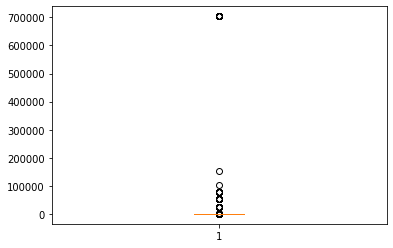

<Figure size 1440x864 with 0 Axes>

In [48]:
plt.boxplot(store_data['order_amount'])
fig = plt.figure(figsize =(20, 12))
plt.show()

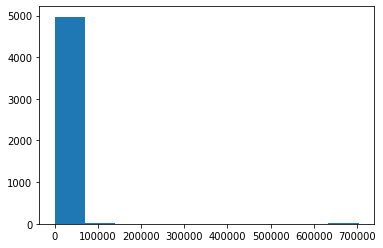

<Figure size 2880x1440 with 0 Axes>

In [49]:
plt.hist(store_data['order_amount'])
fig = plt.figure(figsize =(40, 20))
plt.show()

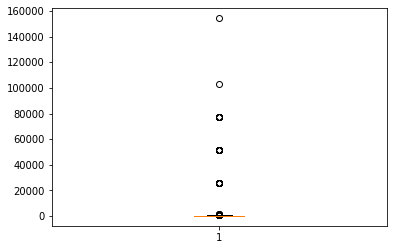

<Figure size 720x504 with 0 Axes>

In [50]:
plt.boxplot(store_data.loc[store_data['order_amount']!=store_data['order_amount'].max()]['order_amount'])
fig = plt.figure(figsize =(10, 7))
plt.show()

1. The plots show the outliers and are proof that simply finding the average of the order_amount column is not a good idea
2. The next best thing would be the **Median Order Value** , but I'm still a bit suspicious about the Highest Order Value/Item Price and would like to investigate it further before making a decision


In [51]:
# Lets first find out who is selling shoes for 25,000 dollars
store_data[store_data.item_price == 25725]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [52]:
shop_78 = store_data[store_data.item_price == 25725]
print('shop_78 Maximum Item Number')
print(shop_78.total_items.max())
print("shop_78 Maximum Order Amount")
print(shop_78.order_amount.max())

shop_78 Maximum Item Number
6
shop_78 Maximum Order Amount
154350


*  While this is strange, I believe the distribution of payment methods (cash, credit and debit card), as well as the difference in time between orders shows it might not be fraud.
*  It is possible the 25,725 was a data entry error and the actual sneaker price was 275.25.
*  This is definitely worth looking in to
*  But strangely enough, this isnt the store with the order_amount of 704,000, so where could this be coming from ?



In [53]:
store_data[store_data.order_amount > 160000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


Now thats VERY strange. 
*  We can observe that at this store, the item price is just $352 , but the order amount is over 700,000 dollars!
* That, corroborated with the fact that all of the orders are by Credit Card, occur from the same user_id and happen at the same time every day show us that theres definitely some foul play involved.
*  This is likely a bot 
* I will flag this as FRAUD, and will be dropping it from re-calculation of the mean. 


In [54]:
# Without the fraudulent store transactions
non_fraud_store_data = store_data[store_data.shop_id != 42]
non_fraud_store_data['order_amount'].describe()

count      4949.000000
mean        754.791675
std        5332.231644
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      154350.000000
Name: order_amount, dtype: float64

In [55]:
# Without the fraudulent store transactions & the expensive sneaker store
non_fraud_non_expense_store_data = store_data[(store_data.shop_id != 42)&(store_data.shop_id != 78)]
non_fraud_non_expense_store_data['order_amount'].describe()

count    4903.000000
mean      300.155823
std       155.941112
min        90.000000
25%       163.000000
50%       284.000000
75%       386.500000
max      1086.000000
Name: order_amount, dtype: float64

In [60]:
# How much of the data are we losing by dropping both these fields ?
print("Total Number of Rows")
total_rows = len(store_data)
print(total_rows)
print("Without the fraudulent store transactions")
num_fraudulent = len(store_data) - len(non_fraud_store_data)
print("fraudulent rows",num_fraudulent)
print("Percentage of Data Lost",(num_fraudulent/total_rows)*100 )
print("-----------------------")
print("Without the fraudulent & Expensive store transactions")
num_non_fraud_non_expense = len(store_data) - len(non_fraud_non_expense_store_data)
print("fraudulent rows",num_non_fraud_non_expense)
print("Percentage of Data lost",(num_non_fraud_non_expense/total_rows)*100 )


Total Number of Rows
5000
Without the fraudulent store transactions
fraudulent rows 51
Percentage of Data Lost 1.02
-----------------------
Without the fraudulent & Expensive store transactions
fraudulent rows 97
Percentage of Data lost 1.94



**Final Answers **
---


##### At the expense of 2% of our data 
##### We can use a metric i'd like to call **Filtered Average Order Value** which is **$300.15**
##### Obtained by recalculating AOV without Outliers and Fraud 
OR 
##### We can use the median value of the sneakers, 
##### As can be noted from the analysis , the value of Median has not been affected by the outliers 

** Therefore: **

---


1a.   I believe it would be better to filter out the fraud and the uncommonly expensive sneakers to the appropriate departments.
But, to still report the Median Order Value 

---


1b.   I would report this **Median Order Value**

---


1c.   its value is **$284**

---




